# # Generate Figure 2
Network distinct response states, in response to different input. A.  Exemplar population activity (n=10 stimuli) reduced in two principal components (PCAL2) over time for n=3 different synaptic reconfigurations (learning conditions). Only delay period is plotted. Time is in seconds. B. Same procedure (population PCAL2 activity) for two structured network instances, with all learning conditions (n=10) pooled together, each responding with K* > n. Clusters identified as in A. C. Boxplot of optimal number of clusters (K*) after k-means (see Methods) for each n=4 structured network instances of n=10 synaptic reshufflings (learning conditions), for n=10 stimuli.

Import necessary modules:

In [1]:
import notebook_module as nb
import analysis_tools as analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from pathlib import Path
from pynwb import NWBHDF5IO
from itertools import chain
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
import seaborn as sb
import math

# Create figure 2.

determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 2
Cannot run kmeans with greater k than the data_pcapoints!
@k:3 k_means Overfit!!!
LC:1: K*:[2]
pcaL2 reseeds the RNG.
L found to be: 2
determine_number_of_clusters reseeds the RNG.


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


pcaL2 reseeds the RNG.
L found to be: 2
Cannot run kmeans with greater k than the data_pcapoints!
@k:2 k_means Overfit!!!
LC:2: K*:[1]
pcaL2 reseeds the RNG.
L found to be: 2
determine_number_of_clusters reseeds the RNG.


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


pcaL2 reseeds the RNG.
L found to be: 3
Cannot run kmeans with greater k than the data_pcapoints!
@k:4 k_means Overfit!!!
LC:3: K*:[3]
pcaL2 reseeds the RNG.
L found to be: 4


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 3
Cannot run kmeans with greater k than the data_pcapoints!
@k:3 k_means Overfit!!!
determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 4
Cannot run kmeans with greater k than the data_pcapoints!
@k:5 k_means Overfit!!!
determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 2
Cannot run kmeans with greater k than the data_pcapoints!
@k:4 k_means Overfit!!!
determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 1
Cannot run kmeans with greater k than the data_pcapoints!
determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 3
Cannot run kmeans with greater k than the data_pcapoints!
@k:3 k_means Overfit!!!
determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 2
Cannot run kmeans with greater k than the data_pcapoints!
@k:2 k_means Overfit!!!
determine_number

C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


pcaL2 reseeds the RNG.
L found to be: 4


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
c:\users\steve\anaconda3\envs\publication\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


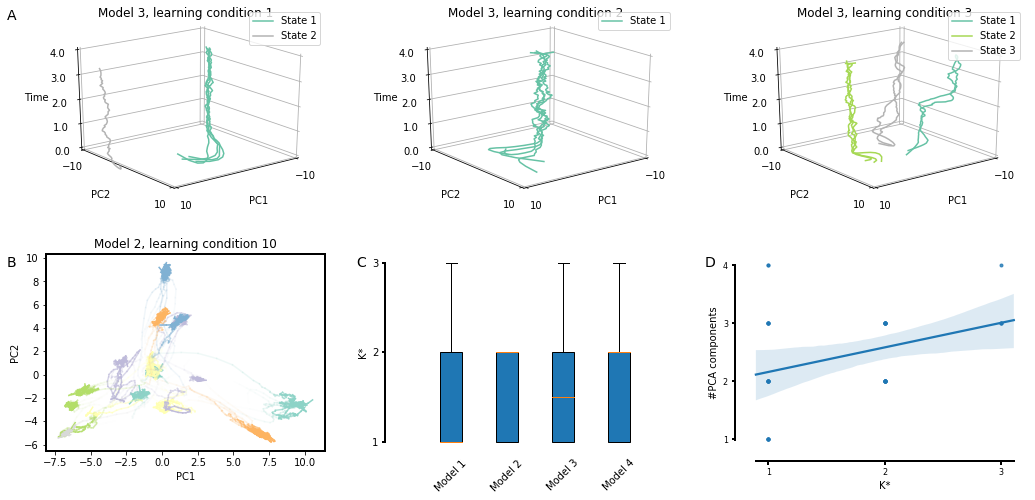

In [2]:
simulations_dir = Path.cwd().joinpath('simulations')
glia_dir = Path(r'G:\Glia')
plt.rcParams.update({'font.family': 'Helvetica'})
plt.rcParams["figure.figsize"] = (15, 15)

y_array = np.linspace(0.1, 100, 1000)
y_i = 500

no_of_conditions = 10
no_of_animals = 4


subplot_width = 3
subplot_height = 2
figure2 = plt.figure(figsize=plt.figaspect(0.5))
figure2_axis = np.zeros((subplot_height, subplot_width), dtype=object)
dataset_name = lambda x : f'Network {x}'

A_axis_a = figure2.add_subplot(
    subplot_height, subplot_width, 1, projection='3d'
)
A_axis_b = figure2.add_subplot(
    subplot_height, subplot_width, 2, projection='3d'
)
A_axis_c = figure2.add_subplot(
    subplot_height, subplot_width, 3, projection='3d'
)
# Plot same animal model, different learning conditions:
conditions = [1,2,3]
condition_axes = [A_axis_a, A_axis_b, A_axis_c]
for axis, (idx, learning_condition) in zip(condition_axes, enumerate(conditions)):
    NWBfile = analysis.load_nwb_file(
        animal_model=3,
        learning_condition=learning_condition,
        experiment_config='structured',
        type='bn',
        data_path=simulations_dir
    )

    trial_len = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfile,
        requested_parameters=['trial_len']
    )
    custom_range = (20, int(trial_len / 50))

    # This should be reproducable with the call above:
    K_star, K_labels, *_ = analysis.determine_number_of_clusters(
        NWBfile_array=[NWBfile],
        max_clusters=no_of_conditions,
        y_array=y_array,
        custom_range=custom_range
    )
    print(f'LC:{learning_condition}: K*:{K_star[y_i]}')

    # Plot the annotated clustering results:
    axis.cla()
    analysis.pcaL2(
        NWBfile_array=[NWBfile],
        klabels=K_labels[y_i, :].T,
        custom_range=custom_range,
        smooth=True, plot_3d=True,
        plot_axes=axis
    )

nb.mark_figure_letter(A_axis_a, 'A')

# TODO: Plot number of clusters per animal/condition (na dw)
# Run for every learning condition and animal the k-means clustering:
optimal_clusters_of_group = defaultdict(partial(np.ndarray, 0))
for animal_model in range(1, no_of_animals + 1):
    # Pool together no of clusters for one animal model:
    K_star_over_trials = np.ones((no_of_conditions, 2))
    for learning_condition in range(1, no_of_conditions + 1):
        # Lazy load the data as a NWB file. Easy to pass around and
        # encapsulates info like trial length, stim times etc.
        #TODO: this might raised some exceptions. Investigate!
        nwbfile = analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )

        trial_len = analysis.get_acquisition_parameters(
            input_NWBfile=nwbfile,
            requested_parameters=['trial_len']
        )

        # TODO: Where is custom range needed? determine a global way
        # of passing it around...
        custom_range = (20, int(trial_len / 50))

        K_star, K_labels, pcno = analysis.determine_number_of_clusters(
            NWBfile_array=[nwbfile],
            max_clusters=no_of_conditions,
            y_array=y_array,
            custom_range=custom_range
        )

        K_star_over_trials[learning_condition - 1, :] = \
            [K_star[y_i], pcno]

    optimal_clusters_of_group[dataset_name(animal_model)] = \
        K_star_over_trials

# Scatter plot PC VS clusters
D_axis = figure2.add_subplot(
    subplot_height, subplot_width, 6
)
D_axis.cla()
#D_axis.set_title('Optimal no of clusters')
K_s = []
PC_no = []
models_list = range(1, no_of_animals + 1)
for pos, animal in enumerate(models_list):
    K_s.append(list(optimal_clusters_of_group[dataset_name(animal)][:,0]))
    PC_no.append(list(optimal_clusters_of_group[dataset_name(animal)][:,1]))

sb.regplot(x=list(chain(*K_s)), y=list(chain(*PC_no)), ax=D_axis, marker='.', color='C0')
scipy.stats.pearsonr(list(chain(*K_s)), list(chain(*PC_no)))
xlim = (1 - 0.2, np.array(list(chain(*K_s))).max() + 0.2)
ylim = (1 - 0.2, np.array(list(chain(*PC_no))).max() + 0.2)
D_axis.set_xlim(xlim[0], xlim[1])
D_axis.set_ylim(ylim[0], ylim[1])
D_axis.set_xticks(list(range(math.ceil(xlim[0]), int(xlim[1]) + 1)))
D_axis.set_yticks(list(range(math.ceil(ylim[0]), int(ylim[1]) + 1)))
D_axis.set_xlabel('K*')
D_axis.set_ylabel('#PCA components')
nb.mark_figure_letter(D_axis, 'D')
nb.axis_normal_plot(D_axis)
nb.adjust_spines(D_axis, ['left', 'bottom'])


C_axis = figure2.add_subplot(
    subplot_height, subplot_width, 5
)
C_axis.cla()
#C_axis.set_title('Optimal no of clusters')
bplots = []
models_list = range(1, no_of_animals + 1)
max_val = 0
for pos, animal in enumerate(models_list):
    bp = C_axis.boxplot(
        optimal_clusters_of_group[dataset_name(animal)][:, 0],
        positions=[pos],
        widths=0.4,
        patch_artist=True
    )
    max_val = np.maximum(max_val, optimal_clusters_of_group[dataset_name(animal)][:, 0].max())

xlim = (-1, 4)
C_axis.set_xlim(xlim[0], xlim[1])
C_axis.set_xticks(list(range(no_of_animals)))
C_axis.set_xticklabels(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
C_axis.set_yticks(list(range(1, int(max_val) + 1)))
C_axis.set_ylabel('K*')
for tick in C_axis.get_xticklabels():
    tick.set_rotation(45)

nb.axis_box_plot(C_axis)
nb.adjust_spines(C_axis, ['left'])
nb.mark_figure_letter(C_axis, 'C')



B_axis = figure2.add_subplot(
    subplot_height, subplot_width, 4
)
# Plot whole animal model state space:
for idx, animal_model in enumerate([2]):
    NWBfiles = [
        analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )
        for learning_condition in range(1, no_of_conditions + 1)
    ]

    trial_len, ntrials = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfiles[0],
        requested_parameters=['trial_len', 'ntrials']
    )
    custom_range = (20, int(trial_len / 50))

    #K_star, K_labels, *_ = analysis.determine_number_of_clusters(
    #    NWBfile_array=NWBfiles,
    #    max_clusters=no_of_conditions * ntrials,
    #    y_array=y_array,
    #    custom_range=custom_range
    #)

    # Plot the annotated clustering results:
    #TODO: are these correctly labeled?
    K_labels = np.matlib.repmat(np.arange(1, len(NWBfiles) + 1), ntrials, 1) \
        .T.reshape(ntrials, -1).reshape(1, -1)[0]
    analysis.pcaL2(
        NWBfile_array=NWBfiles,
        klabels=K_labels,
        custom_range=custom_range,
        smooth=True, plot_2d=True,
        plot_axes=B_axis
    )

nb.mark_figure_letter(B_axis, 'B')

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)

In [ ]:
figure2.savefig('Figure_2.svg')
figure2.savefig('Figure_2.png')
print('Tutto pronto!')


#%%